In [3]:
#1 Reading in the csv-files
import pandas as pd
import matplotlib.pyplot as plt
movieData= pd.read_csv('./Data/movies.csv', dtype={'movieId': 'int32', 'title': 'str'})
ratingData = pd.read_csv('./Data/ratings.csv', dtype={'movieId': 'int32', 'title': 'str',})
movieData.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#1.1b Most rated movies
nr_of_ratings_top_10 = ratingData["movieId"].value_counts().sort_values(ascending=False)
test = ratingData.iloc(axis=1)[:0].head(10)
top10_list = []
title_list = []
for i in range(10):
    top10_list.append(movieData.loc[movieData['movieId'] == nr_of_ratings_top_10.index[i]])
    title_list.append(str(top10_list[i].title))
top10_list

[     movieId                             title       genres
 315      318  Shawshank Redemption, The (1994)  Crime|Drama,
      movieId                title                    genres
 352      356  Forrest Gump (1994)  Comedy|Drama|Romance|War,
      movieId                title                       genres
 293      296  Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller,
      movieId                             title                 genres
 587      593  Silence of the Lambs, The (1991)  Crime|Horror|Thriller,
       movieId               title                  genres
 2487     2571  Matrix, The (1999)  Action|Sci-Fi|Thriller,
      movieId                                      title  \
 257      260  Star Wars: Episode IV - A New Hope (1977)   
 
                       genres  
 257  Action|Adventure|Sci-Fi  ,
      movieId                 title                            genres
 476      480  Jurassic Park (1993)  Action|Adventure|Sci-Fi|Thriller,
      movieId                    ti

In [5]:
#1.1c Most rated movies
sum_of_ratings = 0
amount_of_ratings = 0
average_rating_top_10_most_rated_movies = []
for i in range(10):
    temporary_list = ratingData[ratingData['movieId'] == nr_of_ratings_top_10.index[i]]
    sum_of_ratings += sum(temporary_list["rating"])
    amount_of_ratings += nr_of_ratings_top_10.iloc[i]
    average_rating_top_10_most_rated_movies.append(sum(temporary_list["rating"])/nr_of_ratings_top_10.iloc[i])

print(f"Average rating after taken account the top 10 most rated movies: {sum_of_ratings/amount_of_ratings:.3}")

Average rating after taken account the top 10 most rated movies: 4.1


<BarContainer object of 10 artists>

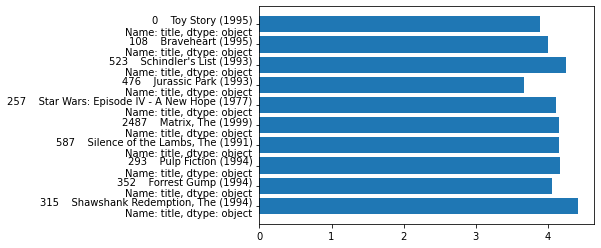

In [32]:
#1.1F Average rating for top10 movies with most ratings
plt.barh(y=title_list, width=  average_rating_top_10_most_rated_movies)

<BarContainer object of 23 artists>

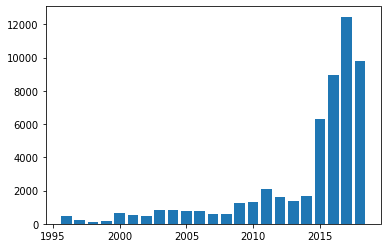

In [25]:
from datetime import datetime # Plot of my own, showing amount of votes per year
listalist = []
ratingData_timestamp = ratingData
ratingData_timestamp.drop_duplicates(subset ="movieId",
                     keep = "last", inplace = True)

for i in range(len(ratingData_timestamp["timestamp"])):
    listalist.append(datetime.fromtimestamp(ratingData_timestamp["timestamp"].iloc[i], tz=None).year)



ratingData_timestamp["year"] = listalist

ratings_per_year = ratingData_timestamp["year"].value_counts()
ratings_per_year = ratings_per_year.sort_values(axis = "index")
plt.bar(x = ratings_per_year.index, height = ratings_per_year)


In [26]:
import re
year_list = []
for i in range(len(movieData["title"])):
    movieData["title"].iloc[1]
    X = re.findall('[0-9]+', movieData["title"].iloc[i])
    try:    
        if int(X[0]) > 1870 and int(X[0]) < 2023: 
           year_list.append(int(X[0]))
    except IndexError:
            year_list.append(0)


In [31]:
test = pd.DataFrame(year_list).value_counts()
test = test.sort_index()
plt.bar(x=test.index, height=test)

TypeError: int() argument must be a string, a bytes-like object or a number, not 'MultiIndex'

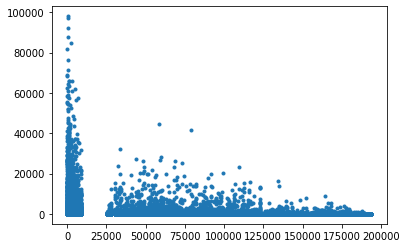

In [ ]:
#1.1e amount of ratings against MovieId
ratingData = pd.read_csv('./Data/ratings.csv', dtype={'movieId': 'int32', 'title': 'str',})
nr_of_ratings_per_movie_id = ratingData["movieId"].value_counts().sort_values(ascending=False)
nr_of_ratings_per_movie_id


plt.plot(nr_of_ratings_per_movie_id, ".")